In [ ]:
#Import libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training data:", x_train.shape)
print("Testing data:", x_test.shape)

Training data: (50000, 32, 32, 3)
Testing data: (10000, 32, 32, 3)


In [ ]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(x_train)

In [ ]:
#Build CNN Model
inputs = Input(shape=(32,32,3))

x = Conv2D(32, (3,3), activation='relu', padding='same', name="conv1")(inputs)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same', name="conv2")(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same', name="conv3")(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train Model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 135s 170ms/step - accuracy: 0.3357 - loss: 1.8067 - val_accuracy: 0.5465 - val_loss: 1.2612
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 129s 165ms/step - accuracy: 0.5537 - loss: 1.2565 - val_accuracy: 0.6398 - val_loss: 1.0240
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 129s 165ms/step - accuracy: 0.6136 - loss: 1.0941 - val_accuracy: 0.6670 - val_loss: 0.9661
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 129s 165ms/step - accuracy: 0.6525 - loss: 0.9823 - val_accuracy: 0.6752 - val_loss: 0.9420
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 132s 169ms/step - accuracy: 0.6732 - loss: 0.9314 - val_accuracy: 0.6971 - val_loss: 0.8983
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 129s 165ms/step - accuracy: 0.6926 - loss: 0.8812 - val_accuracy: 0.7058 - val_loss: 0.8430
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 170ms/step - accuracy: 0.7088 - loss: 0.8343 - val_accuracy: 0.7276 - val_loss: 0.8005
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 129s 164ms/step - accuracy: 0.7177 - loss: 0.80

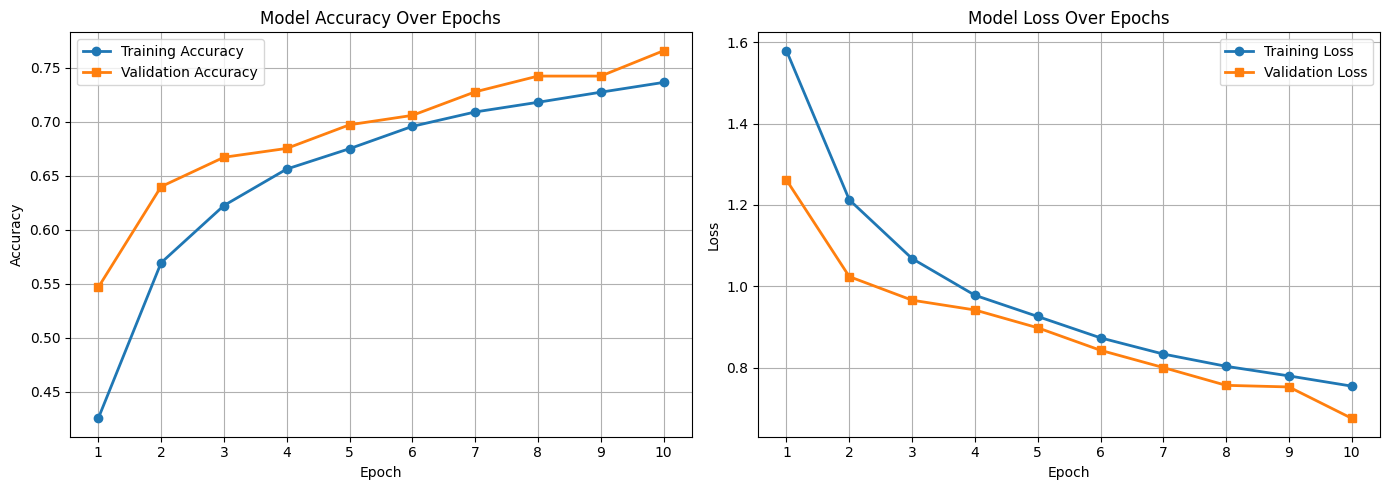

In [ ]:
#Plot training history
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(14,5))

# 🔹 Accuracy Plot
plt.subplot(1,2,1)
plt.plot(epochs, history.history['accuracy'], marker='o', linewidth=2, label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], marker='s', linewidth=2, label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.grid(True)
plt.legend()

# 🔹 Loss Plot
plt.subplot(1,2,2)
plt.plot(epochs, history.history['loss'], marker='o', linewidth=2, label='Training Loss')
plt.plot(epochs, history.history['val_loss'], marker='s', linewidth=2, label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 - 6s - 20ms/step - accuracy: 0.7657 - loss: 0.6757
Test Accuracy: 0.7657


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


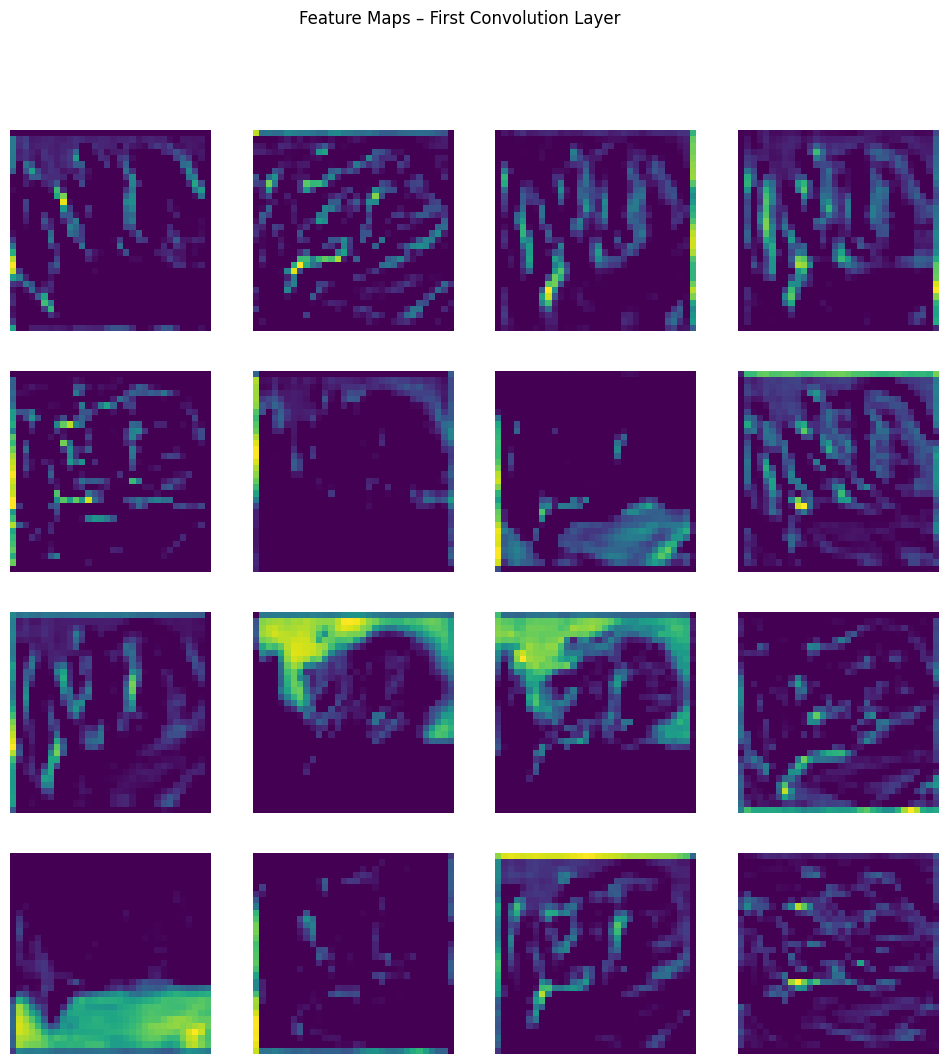

In [ ]:
#Feature Map Visualization
# Pick one test image
sample_img = x_test[0].reshape(1,32,32,3)

# Collect convolution layers
conv_layers = [layer for layer in model.layers if 'conv' in layer.name]

# Create intermediate model
feature_model = Model(
    inputs=model.input,
    outputs=[layer.output for layer in conv_layers]
)

# Get feature maps
feature_maps = feature_model.predict(sample_img)

# Visualize first Conv layer
first_layer_map = feature_maps[0]

plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(first_layer_map[0,:,:,i], cmap='viridis')
    plt.axis('off')

plt.suptitle("Feature Maps – First Convolution Layer")
plt.show()